# Práctica 2: Primera exploración a los datos

In [65]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [67]:
path = 'hotel_bookings.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [69]:
df.shape#para ver las dimensiones del conjunto de datos 

(119390, 32)

In [70]:
df.columns.values.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [71]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [72]:
df.isnull().any().any()

True

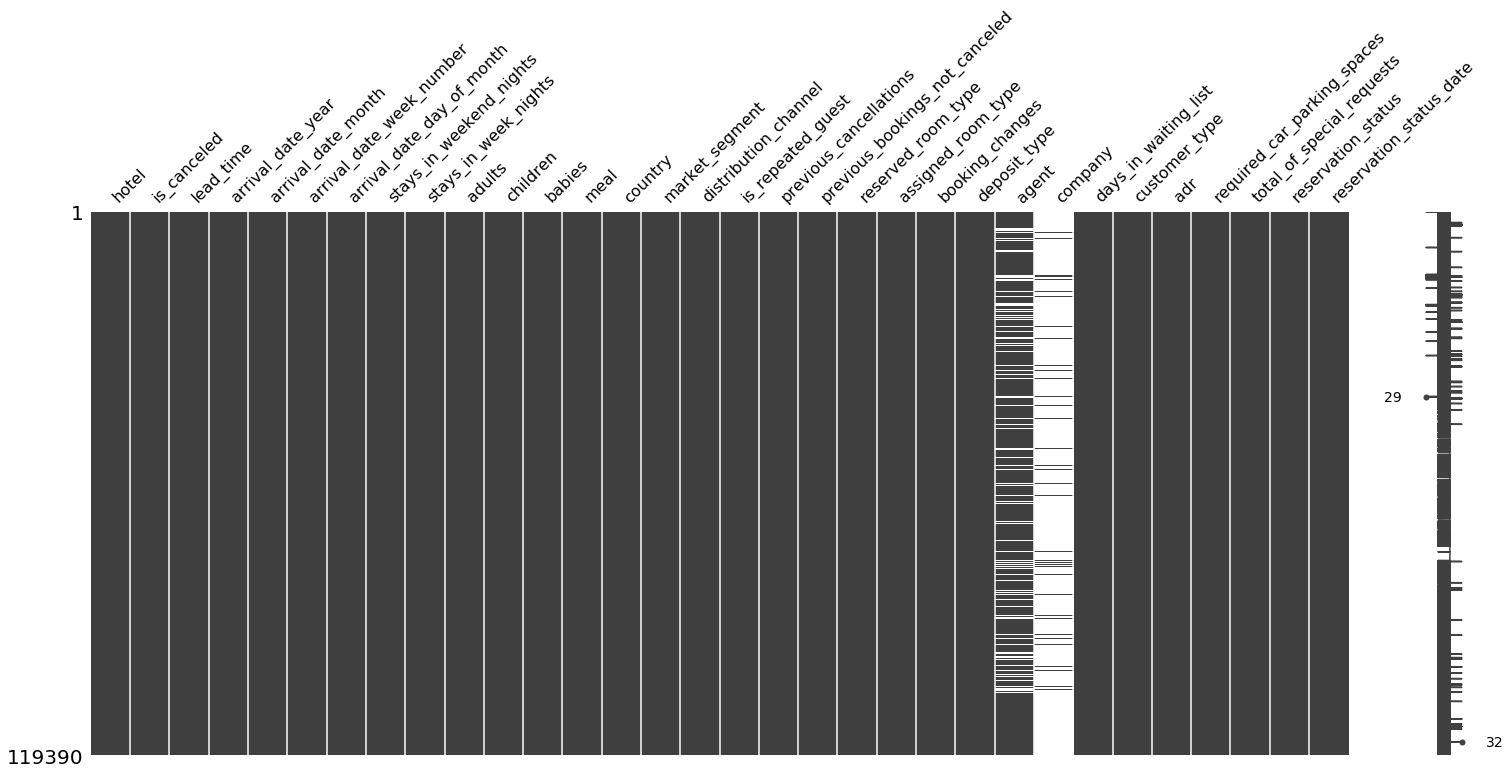

In [73]:
msno.matrix(df)

In [74]:
df.replace({' ': np.nan}, inplace=True) #espacios reemplazados con nan

In [75]:
df.isnull().any().any()

True

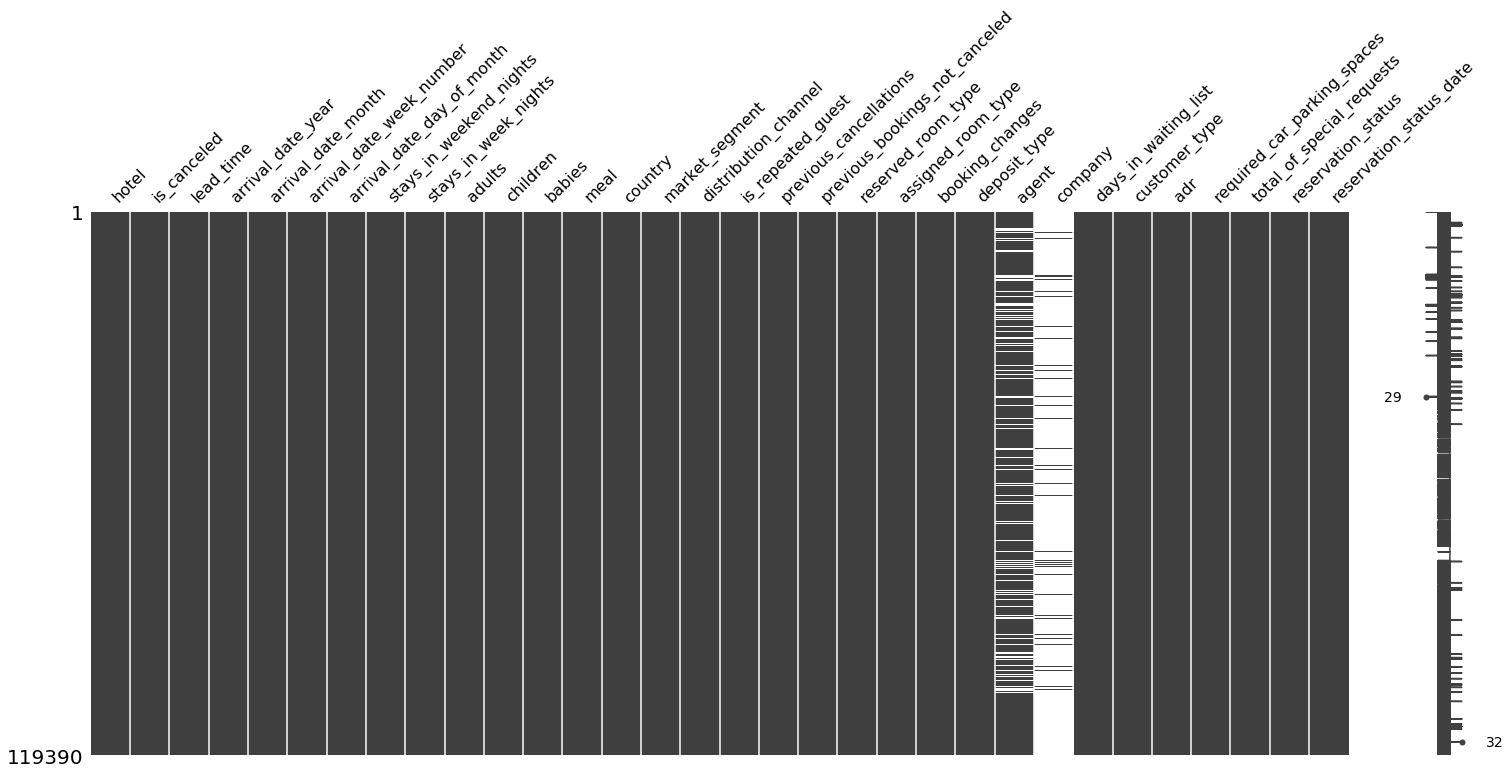

In [76]:
msno.matrix(df)

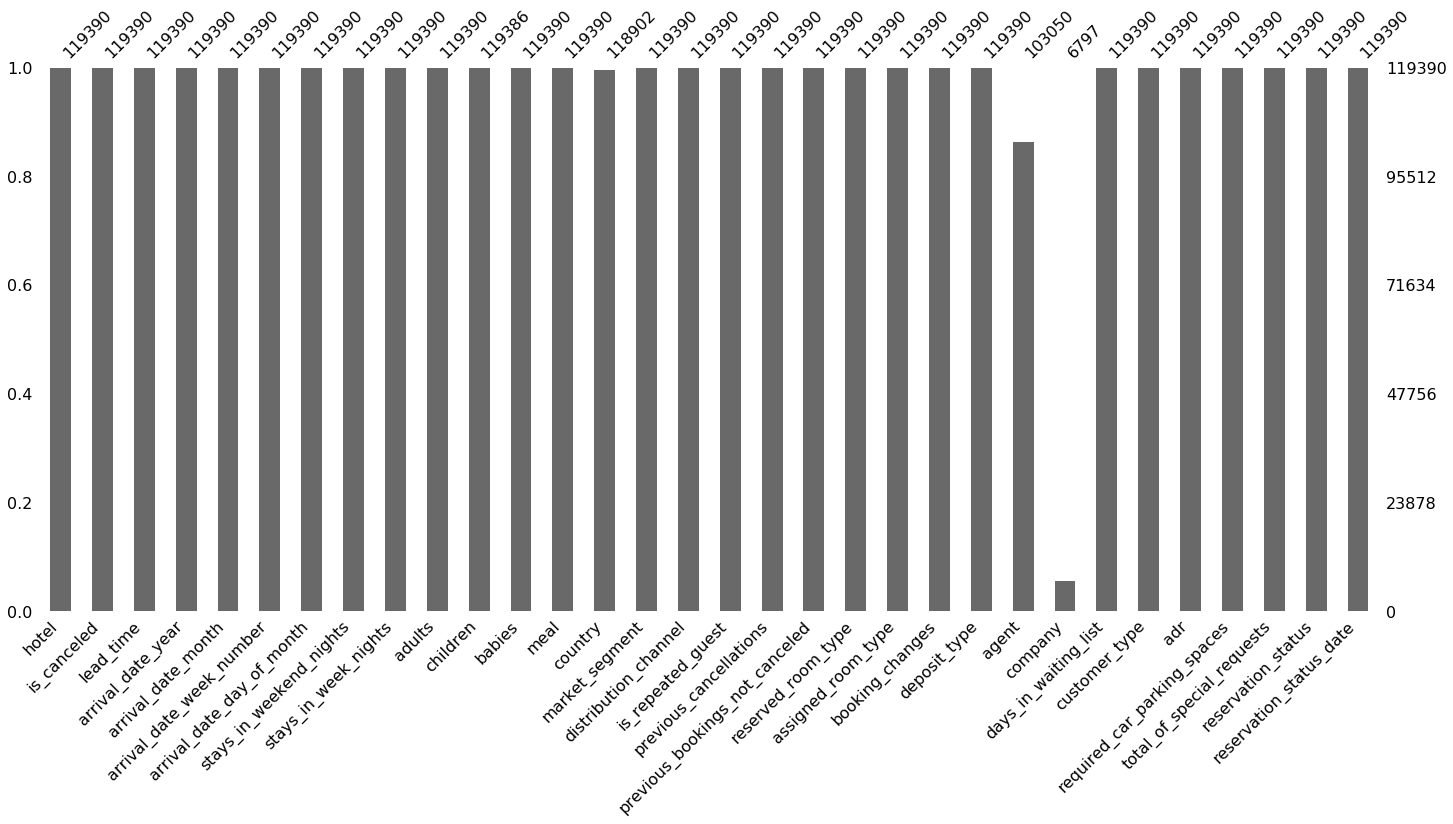

In [77]:
msno.bar(df) #todo lo que este debajo del 80 

In [78]:
df.columns[df.isnull().any()].tolist()

['children', 'country', 'agent', 'company']

In [79]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [80]:
df.loc[[0]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [81]:
df.loc[:2400]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,Resort Hotel,1,99,2015,October,42,11,1,0,2,...,No Deposit,251.0,NaN,0,Transient,67.0,0,0,Canceled,2015-09-28
2397,Resort Hotel,0,1,2015,October,42,11,1,0,2,...,No Deposit,240.0,NaN,0,Transient,56.4,1,0,Check-Out,2015-10-12
2398,Resort Hotel,1,87,2015,October,42,11,2,2,1,...,No Deposit,240.0,NaN,0,Transient,42.3,0,0,Canceled,2015-09-11
2399,Resort Hotel,1,12,2015,October,42,11,2,2,2,...,No Deposit,240.0,NaN,0,Transient,50.4,0,2,Canceled,2015-09-30


In [82]:
df.drop([0,24,51], axis=0).head()   #inplace: que si lo haga en el conjunto de datos

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [83]:
df[100:].head() #df.tail(-100) )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
100,Resort Hotel,0,4,2015,July,27,4,2,1,2,...,No Deposit,250.0,NaN,0,Transient,92.67,0,1,Check-Out,2015-07-07
101,Resort Hotel,0,98,2015,July,27,4,2,1,2,...,No Deposit,8.0,NaN,0,Transient,71.55,1,0,Check-Out,2015-07-07
102,Resort Hotel,0,92,2015,July,27,4,2,4,1,...,No Deposit,241.0,NaN,0,Transient,96.49,0,2,Check-Out,2015-07-10
103,Resort Hotel,0,95,2015,July,27,4,2,4,2,...,No Deposit,240.0,NaN,0,Transient,85.80,1,2,Check-Out,2015-07-10
104,Resort Hotel,0,102,2015,July,27,4,2,5,2,...,No Deposit,240.0,NaN,0,Transient,96.30,0,1,Check-Out,2015-07-11


In [84]:
df.drop(df.index[1:5], axis=0).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2015-06-23
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,145.00,0,0,Check-Out,2015-07-05
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,No Deposit,241.0,NaN,0,Transient,154.77,0,1,Check-Out,2015-07-05


In [85]:
df.arrival_date_day_of_month.values

array([ 1,  1,  1, ..., 31, 31, 29], dtype=int64)

In [86]:
df['arrival_date_day_of_month'].values

array([ 1,  1,  1, ..., 31, 31, 29], dtype=int64)

In [87]:
df.arrival_date_day_of_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [88]:
df.arrival_date_day_of_month.value_counts()

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

In [89]:
df.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


In [90]:
df.groupby('hotel').agg(['count', 'size', 'nunique']).stack()

is_canceled  lead_time  arrival_date_year  \
hotel                                                             
City Hotel   count          79330      79330              79330   
             size           79330      79330              79330   
             nunique            2        453                  3   
Resort Hotel count          40060      40060              40060   
             size           40060      40060              40060   
             nunique            2        412                  3   

                      arrival_date_month  arrival_date_week_number  \
hotel                                                                
City Hotel   count                 79330                     79330   
             size                  79330                     79330   
             nunique                  12                        53   
Resort Hotel count                 40060                     40060   
             size                  40060                     40060   
             nunique                  12                        53   

                      arrival_date_day_of_month  stays_in_weekend_nights  \
hotel                                                                      
City Hotel   count                        79330                    79330   
             size                         79330                    79330   
             nunique                         31                       14   
Resort Hotel count                        40060                    40060   
             size                         40060                    40060   
             nunique                         31                       16   

                      stays_in_week_nights  adults  children  ...  \
hotel                                                         ...   
City Hotel   count                   79330   79330     79326  ...   
             size                    79330   79330     79330  ...   
             nunique                    29       5         4  ...   
Resort Hotel count                   40060   40060     40060  ...   
             size                    40060   40060     40060  ...   
             nunique                    31      14         5  ...   

                      deposit_type  agent  company  days_in_waiting_list  \
hotel                                                                      
City Hotel   count           79330  71199     3689                 79330   
             size            79330  79330    79330                 79330   
             nunique             3    223      207                   115   
Resort Hotel count           40060  31851     3108                 40060   
             size            40060  40060    40060                 40060   
             nunique             3    185      235                    44   

                      customer_type    adr  required_car_parking_spaces  \
hotel                                                                     
City Hotel   count            79330  79330                        79330   
             size             79330  79330                        79330   
             nunique              4   5405                            4   
Resort Hotel count            40060  40060                        40060   
             size             40060  40060                        40060   
             nunique              4   5880                            5   

                      total_of_special_requests  reservation_status  \
hotel                                                                 
City Hotel   count                        79330               79330   
             size                         79330               79330   
             nunique                          6                   3   
Resort Hotel count                        40060               40060   
             size                         40060               40060   
             nunique                          6        

In [91]:
df.groupby('hotel').agg(['count', 'size', 'nunique'])

is_canceled                lead_time                 \
                   count   size nunique     count   size nunique   
hotel                                                              
City Hotel         79330  79330       2     79330  79330     453   
Resort Hotel       40060  40060       2     40060  40060     412   

             arrival_date_year                arrival_date_month  ...  \
                         count   size nunique              count  ...   
hotel                                                             ...   
City Hotel               79330  79330       3              79330  ...   
Resort Hotel             40060  40060       3              40060  ...   

             required_car_parking_spaces total_of_special_requests         \
                                 nunique                     count   size   
hotel                                                                       
City Hotel                             4                     79330  79330   
Resort Hotel                           5                     40060  40060   

                     reservation_status                 \
             nunique              count   size nunique   
hotel                                                    
City Hotel         6              79330  79330       3   
Resort Hotel       6              40060  40060       3   

             reservation_status_date                 
                               count   size nunique  
hotel                                                
City Hotel                     79330  79330     864  
Resort Hotel                   40060  40060     913  

[2 rows x 93 columns]

In [92]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8030,Resort Hotel,1,238,2016,September,37,7,0,3,1,...,Non Refund,1.0,NaN,0,Transient,89.00,0,0,Canceled,2016-02-09
37532,Resort Hotel,0,33,2017,June,25,19,1,1,2,...,No Deposit,240.0,NaN,0,Transient,154.00,1,1,Check-Out,2017-06-21
76865,City Hotel,1,239,2015,October,42,17,0,1,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2015-08-17
1960,Resort Hotel,0,64,2015,September,39,24,0,3,2,...,No Deposit,240.0,NaN,0,Transient,80.10,0,2,Check-Out,2015-09-27
98971,City Hotel,0,34,2016,October,41,2,2,3,2,...,No Deposit,7.0,NaN,0,Transient,95.47,0,1,Check-Out,2016-10-07


In [93]:
df.shape

(119390, 32)

In [94]:
df_sample.shape

(5970, 32)

In [95]:
df_dropped = df.dropna(subset=['company'])
df_dropped.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,...,No Deposit,NaN,110.0,0,Transient,104.72,1,1,Check-Out,2015-07-10
295,Resort Hotel,0,84,2015,July,28,11,1,1,2,...,No Deposit,NaN,113.0,0,Transient,100.00,1,0,Check-Out,2015-07-13


In [96]:
df_dropped.shape

(6797, 32)

In [97]:

df_copy = df.copy()
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [98]:

df_copy.shape

(119390, 32)

In [99]:
df_dropped['adr'].dtype

dtype('float64')

In [100]:

df_dropped['adr'].mean()

67.27418567014863

In [101]:

df_copy['adr'].fillna(value=np.round(df['adr'].mean(),decimals=0), inplace=True)

In [102]:
df_copy.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


# Handling Categorical Data

In [103]:

list(df['hotel'].unique())

['Resort Hotel', 'City Hotel']

In [104]:
df['hotel'].replace({'Resot_Hotel' :"Recurso ", 
                    'City_Hotel' : "Ciudad"}, inplace=True)

In [105]:
list(df['hotel'].unique())

['Resort Hotel', 'City Hotel']

In [106]:
keys = list(df['hotel'].unique())
vals = range(1,3)
act = dict(zip(keys, vals))
act

{'Resort Hotel': 1, 'City Hotel': 2}

In [107]:

df_copy['hotel'] = df['hotel'].map(act)
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [108]:
list(df_copy['hotel'].unique())

[1, 2]

# Data Summarization

In [109]:
df_copy['hotel'].mean()

1.6644610101348523

In [110]:
df_copy['hotel'][df_copy['arrival_date_week_number'] == 6]

3863      1
3864      1
3865      1
3866      1
3867      1
         ..
105933    2
105941    2
105943    2
105958    2
106376    2
Name: hotel, Length: 1508, dtype: int64

In [111]:
df_copy['hotel'][df_copy['arrival_date_week_number'] == 6].mean()

1.5477453580901857

In [113]:
df_copy.groupby(["is_canceled", "lead_time", "arrival_date_year"]).count()

hotel  arrival_date_month  \
is_canceled lead_time arrival_date_year                              
0           0         2015                1373                1373   
                      2016                2859                2859   
                      2017                1683                1683   
            1         2015                 604                 604   
                      2016                1602                1602   
...                                        ...                 ...   
1           608       2017                  17                  17   
            615       2017                  17                  17   
            622       2017                  17                  17   
            626       2016                  30                  30   
            629       2017                  17                  17   

                                         arrival_date_week_number  \
is_canceled lead_time arrival_date_year                             
0           0         2015                                   1373   
                      2016                                   2859   
                      2017                                   1683   
            1         2015                                    604   
                      2016                                   1602   
...                                                           ...   
1           608       2017                                     17   
            615       2017                                     17   
            622       2017                                     17   
            626       2016                                     30   
            629       2017                                     17   

                                         arrival_date_day_of_month  \
is_canceled lead_time arrival_date_year                              
0           0         2015                                    1373   
                      2016                                    2859   
                      2017                                    1683   
            1         2015                                     604   
                      2016                                    1602   
...                                                            ...   
1           608       2017                                      17   
            615       2017                                      17   
            622       2017                                      17   
            626       2016                                      30   
            629       2017                                      17   

                                         stays_in_weekend_nights  \
is_canceled lead_time arrival_date_year                            
0           0         2015                                  1373   
                      2016                                  2859   
                      2017                                  1683   
            1         2015                                   604   
                      2016                                  1602   
...                                                          ...   
1           608       2017                                    17   
            615       2017                                    17   
            622       2017                                    17   
            626       2016                                    30   
            629       2017                                    17   

                                         stays_in_week_nights  adults  \
is_canceled lead_time arrival_date_year                                 
0           0         2015                               1373    1373   
                      2016                               2859    2859   
                      2017                               1683    1683   
            1         2015                                604     604  

In [114]:
df_copy.arrival_date_week_number


0         27
1         27
2         27
3         27
4         27
          ..
119385    35
119386    35
119387    35
119388    35
119389    35
Name: arrival_date_week_number, Length: 119390, dtype: int64

In [115]:

df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8030,Resort Hotel,1,238,2016,September,37,7,0,3,1,...,Non Refund,1.0,NaN,0,Transient,89.00,0,0,Canceled,2016-02-09
37532,Resort Hotel,0,33,2017,June,25,19,1,1,2,...,No Deposit,240.0,NaN,0,Transient,154.00,1,1,Check-Out,2017-06-21
76865,City Hotel,1,239,2015,October,42,17,0,1,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2015-08-17
1960,Resort Hotel,0,64,2015,September,39,24,0,3,2,...,No Deposit,240.0,NaN,0,Transient,80.10,0,2,Check-Out,2015-09-27
98971,City Hotel,0,34,2016,October,41,2,2,3,2,...,No Deposit,7.0,NaN,0,Transient,95.47,0,1,Check-Out,2016-10-07


In [118]:
df_sample.groupby(["hotel",  "is_canceled"]).agg({'arrival_date_week_number':np.mean,'arrival_date_day_of_month':np.max})

arrival_date_week_number  arrival_date_day_of_month
hotel        is_canceled                                                     
City Hotel   0                           26.618007                         31
             1                           27.364964                         31
Resort Hotel 0                           27.213468                         31
             1                           28.200723                         31